In [1]:
%run pylib/fermi_sources

show(f"""# Application of `scikit-learn` to Fermi sources""")
# show_date()
fs_data = FermiSources('files/fermi_sources_v2.csv')
show(fs_data.mlspec)

# Application of `scikit-learn` to Fermi sources

Read 6699 source entries from `files/fermi_sources_v2.csv`, selected 6491 with criteria 'delta<0.25 & curvature<1.01'

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f54102d0fd0>

In [2]:
show(f"""## Training dataset
Select the dominant components in the associated sources for 
training: 
* Blazars, either FSRQ (fsrq) or BL Lac (bll)
* Pulsars (psr)

We will use as features the three spectral parameters and 
the BB interval count, `nbb`.
""")

## Training dataset
Select the dominant components in the associated sources for 
training: 
* Blazars, either FSRQ (fsrq) or BL Lac (bll)
* Pulsars (psr)

We will use as features the three spectral parameters and 
the BB interval count, `nbb`.

In [3]:
# sfl = SpecFunLookup(fs_data.df) #[unid.index[1]]
# specfun = pd.Series(dict([ (idx,sfl[idx]) for idx in fs_data.df.index]))
# peaks = specfun.apply(lambda f: f.sedfun.peak)
# fs_data.df.loc[:,'log_epeak'] = peaks


* run a classification, with model GaussianNB 

* use if to make prediction for the unid set

### Confusion matrix
* Model: GaussianNB<br>
* Features: ['log_nbb', 'log_epeak', 'pindex', 'curvature']<br>
Accuracy: 81%

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f54102ec790>
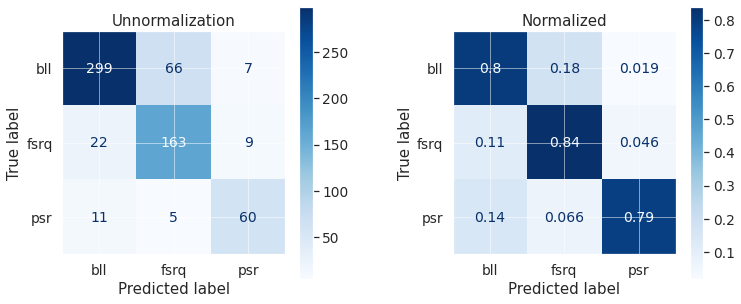

In [4]:
from sklearn.naive_bayes import GaussianNB 
model= GaussianNB()
show(f"""* run a classification, with model {model.__class__.__name__} """)
classifier = fs_data.fit(model)

show(f"""* use if to make prediction for the unid set""")
fs_data.df.loc[:,'prediction'] = fs_data.predict(classifier, 'association=="unid"')
fs_data.confusion_display(model)

### Pairplot of features used for training

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f540ef74670>
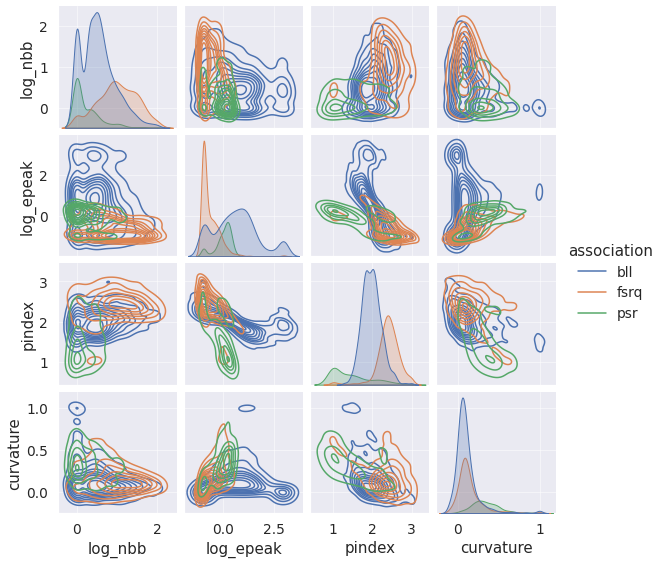

In [5]:
show("""### Pairplot of features used for training""")# show(str(train).replace('\n','<br>\n *'))
show(fs_data.pairplot(height=2))

### Pairplot for unassociated sources
Includes `abs_sin_b` and `log_eflux` not used in fit.<br>

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f53fe70b190>
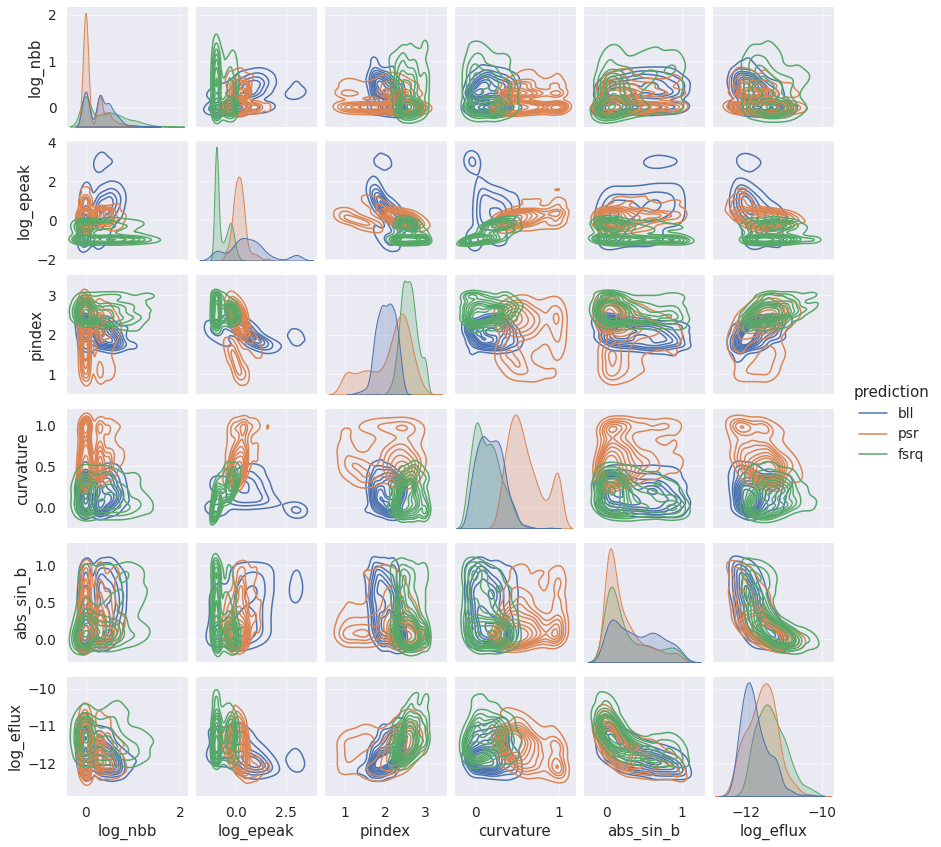

In [6]:
show(f""" ### Pairplot for unassociated sources
Includes `abs_sin_b` and `log_eflux` not used in fit.<br>
""")
ml = fs_data.mlspec
ml = MLspec(ml.features +  tuple('abs_sin_b log_eflux'.split()),
      'prediction')
show(fs_data.pairplot( ml) )

In [12]:
### Special to lookup spectral type


    
sfl = SpecFunLookup(fs_data.df) #[unid.index[1]]

unid_df = fs_data.df.query('association=="unid"').copy()
plex= np.array([sfl[idx]!='LogParabola' for idx in unid_df.index])
unid_df.loc[:,'plex'] = plex
markers = ['o' if p else '+' for p in plex]


### Spectral index vs. curvature 
Here we look at a result of the prediction of the source identities for the _unid_ 
sources, the two spectral shape parameters.

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f540f7beeb0>
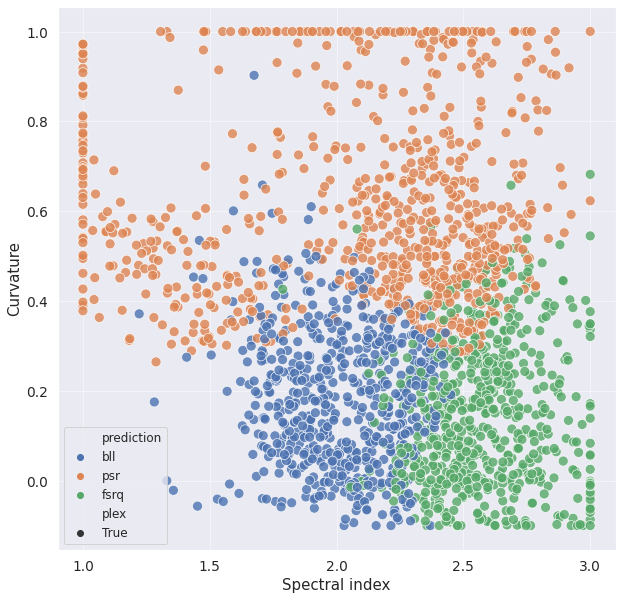

The evident split of the psr-predicted sources into two groups correlates
with the spectral model used by pointlike:
* The lower index group, on the left, were fit using the 
PLEX model, for which the index is the low-energy slope of the SED curve; 
* The remainder 
were fit with the LP model, for which the index is the slope at the pivot energy.

In [15]:
show(f"""### Spectral index vs. curvature 
Here we look at a result of the prediction of the source identities for the _unid_ 
sources, the two spectral shape parameters.
""")
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(unid_df, x='pindex', y='curvature', hue='prediction', 
                style='plex', s=100, alpha=0.8);
ax.legend(fontsize=12,)# title='Prediction');
ax.set(xticks=np.arange(1,3.1,0.5), xlabel='Spectral index', ylabel='Curvature')
show(fig, caption=f"""Scatterplot of the curvature vs. spectral index for 
the _unid_ category. Colors correspond to the ML prediction. Markers are x-shaped for
PLEX spectral shapes, circles log parabolas. 
""")
show(f"""The evident split of the psr-predicted sources into two groups correlates
with the spectral model used by pointlike:
* The lower index group, on the left, were fit using the 
PLEX model, for which the index is the low-energy slope of the SED curve; 
* The remainder 
were fit with the LP model, for which the index is the slope at the pivot energy.
""")

In [26]:
show(f"""### Compare classified psr spectral parameters with those for the actual pulsars

""")

real_psr = fs_data.df.query('association=="psr"').copy()
real_psr.loc[:,'category'] = 'actual psr'
tagged_psr = unid_df.query('prediction=="psr"').copy()
tagged_psr.loc[:,'category']='unid classified as psr'
pcompdata = pd.concat([real_psr,tagged_psr])


### Compare classified psr spectral parameters with those for the actual pulsars

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f540f280340>
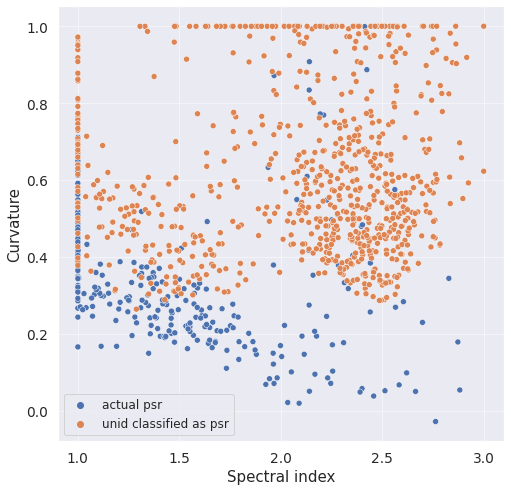

In [27]:

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(pcompdata, x='pindex', y='curvature', hue='category', ax=ax)
ax.set(xticks=np.arange(1,3.1,0.5), xlabel='Spectral index', ylabel='Curvature')
ax.legend(fontsize=12)
show(fig, caption=f"""
""")

### A diagonal separates the two populations
Plot `(pindex-1)/2 + curvature`

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f540f932d30>
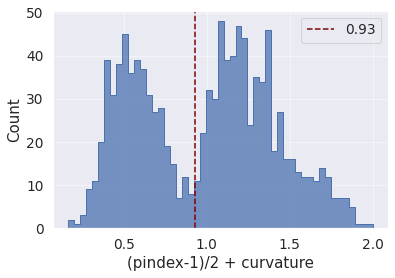

In [28]:
show(f"""### A diagonal separates the two populations
Plot `(pindex-1)/2 + curvature`
""")

u = (pcompdata.pindex-1)/2+ pcompdata.curvature
pcompdata.loc[:,'u'] = u
ax = sns.histplot(df, x=u, bins=51, element='step')
ax.axvline(0.93, ls='--', color='maroon', label='0.93');
ax.set(xlabel= '(pindex-1)/2 + curvature')
ax.legend()
show(ax.figure, caption='Showing separation')

### Energy flux dependence

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f540f707e80>
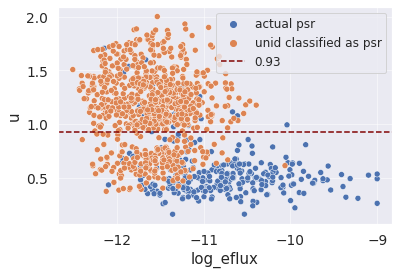

--> Why don't the identified pulsars overlap?

In [29]:
show("""### Energy flux dependence""")
ax = sns.scatterplot(pcompdata, x='log_eflux', y='u', hue='category');

ax.axhline(0.93, ls='--', color='maroon', label='0.93');
ax.legend(fontsize=12)
ax.set(xticks= (-12, -11, -10, -9))
show(plt.gcf())
show("""--> Why don't the identified pulsars overlap?""")

In [31]:
n,m = sum(u<0.93), len(df)
show(f'Making the cut shown, conclude that there are {n} pulsars, and {m-n} of this unknown spectral type.')
show(f"""* Retag the sources tagged as "psr" """)
psrcut = unid_df.prediction=='psr'
unidx = unid_df.copy()
unidx.loc[psrcut & (u>0.93),'category']='X'
unidx.loc[psrcut & (u<0.93),'category']='psr-like'

Making the cut shown, conclude that there are 458 pulsars, and 632 of this unknown spectral type.

* Retag the sources tagged as "psr" 

In [32]:
xsrc, psrc = [unidx[psrcut].query(f'category == "{cat}"') for cat in 'X psr-like'.split().copy()]

show(f"""* Separate tagged psr into {len(xsrc)} "X" sources and {len(psrc)} that are Pulsar-like """)
show(f"""### Examine the {len(xsrc)} "X" sources""")
xds = DataSet(unid.loc[xsrc.index])
g = sns.PairGrid(xds, vars='pindex curvature abs_sin_b log_eflux'.split(), 
                 corner=True, despine=True, height=2, )
g.map_diag(sns.histplot,element='step', color='green',bins=25)
g.map_offdiag(sns.scatterplot, color='green')     
show(plt.gcf())
show(f"""Notes:
* These are (mostly) Galactic
* Strong correlation between latitude and flux
""")

* Separate tagged psr into 599 "X" sources and 179 that are Pulsar-like 

### Examine the 599 "X" sources

NameError: name 'DataSet' is not defined

In [ ]:
show("""## Sky plots of the unassociated sources""")
bsrc = unidx.query('category=="bll" | category=="fsrc"')
bll = unidx.query('category=="bll"')
fsrq = unidx.query('category=="fsrq"')
for src, label in [(xsrc, '"X"'), (psrc, 'psr-like'), (bll, 'bll-like'),(fsrq, 'fsrq-like')]:
    show(f"""### The {len(src)} {label} sources""")
    fs_data.show_positions(src) 


In [ ]:
show(f"""## Associated sky plots""")
for cat in 'psr bll fsrq'.split():
    show(f"""### {cat}: """)
    fs_data.show_positions(fs_data.df.query(f'category=="{cat}"'));

In [ ]:
outfile= 'files/unid_table.csv'
show(f"""## Write unid info to {outfile}""")
self=fs_data
unid_coord = SkyCoord(pd.Series(self.skycoord, index=self.df.index)[unidx.index].values)
out_df = pd.concat([unidx, fs_data.df.loc[unidx.index, 'ts r95 glat uw_name'.split()]], axis=1)
out_df['ra']  = unid_coord.fk5.ra.deg
out_df['dec'] = unid_coord.fk5.dec.deg
out_df.to_csv(outfile, float_format='%.6f')